In [ ]:
import numpy as np
pi = np.pi
from sympy import latex
from IPython.display import display, Math


h = 4.136 * 10**(-15) # in eV*s
h_bar = h/(2*pi) # in eV/Hz
m_e = 9.109 * 10**(-31) # in kg
c = 299792458 #in m/s
q = 1.6022*10**(-19)

# 1.
Assume that $\varphi_n \left(x \right)$ are the eigenfunctions in an infinite square well $( \rightarrow\infty \text{ for } x<0 \text{ and } x>a)$. Calculate the overlap integrals
$\int_{0}^{a}{{\varphi_n}^\ast\left(x\right)\varphi_m\left(x\right)dx.}$

(Hint: The eigenfunctions to different eigenvalues are supposed to be orthogonal). (434: 6 pts, 591: 4 pts)


<br></br>
In quantum mechanics, eigenfunctions (AKA eigenstates) represent states corresponding to physically measurable values, (where
the measured values are the eigenvalues).  That is, they each correspond to a single solution to the Schrodinger equation, the
superposition of which gives the wavefunction.  But since we never observe an individual particle to be in a superposition of
states, only ever in a single state at once (although measuring many particles with the same wavefunction reproduces the
superposition), it's necesarry that eigenstates with different eigenvalues be mutually exclusive, which requires they be
mutually orthogonal.  Hence, there can be no nonzero overlap between eigenstates with different eigenvalues.  For eigenstates
with the same eigenvalue, the overlap will of course be 1 or 100%.

In summary, because eigenstates with different eigenvalues are orthogonal to each other, their overlap will always be zero.
On the other hand, eigenstates with the same eigenvalue are simply constant multiples of each other and so their overlap will
be 1.

# 2.
For an infinite potential well of width $15$ nm, compute the energies associated with the transitions between the five lowest levels. Give the answers in eV. (434: 10 pts, 591: 5 pts)

<br></br>
For a particle trapped in an infinite square well, the energy level is quantized due to the boundary conditions applied to the Schrodinger equation.  The energy levels are given by the equation:
$E_n = \frac{\hbar^2 n^2 \pi^2}{2mw^2}$

In [251]:
def infinite_well_energy_transition(n2, n1):
  w = 15 * 10**(-9) #in meters
  def infinite_well_energy(n):
    return (h_bar**2 * n**2 * pi**2)/(2 * m_e * w**2) #using regular electron mass,
                                                      #since problem doesn't specify particle type
  return infinite_well_energy(n2) - infinite_well_energy(n1)

transitions = ['5\\rightarrow 4', '4\\rightarrow 3', '3\\rightarrow 2', '2\\rightarrow 1']
for i in range(0,4):
  E_0 = infinite_well_energy_transition(5 - i, 4 - i) * q
  #times 1.6022*10^(-19) to convert hbar to be in terms of Joules then the answer back to eV
  display(Math(f'\Delta E_n({transitions[i]}) = '
               f'{round(E_0, 5)}\\text{{ eV}} = '
               f'{round(10 ** (3) * E_0, 2)} \\text{{ meV}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 3.
a.
For a finite potential well of width 20 nm and height 0.2 eV (use an effective mass appropriate to GaAs electrons, m = 0.067m0), compute the energy needed to ionize an electron (move it from the lowest energy level to the top of the well).

b.
If a 0.3 eV photon excites the electron out of the well, what is its kinetic energy? What is its wavelength? (434: 12 pts, 591: 8 pts)

# a.
Inside a finite well, a particle has the wavefunction

$\psi(x)_1 = D\cos(lx) \tag{1}$

where

$l = \frac{\sqrt{2m(V_0 - E)}}{\hbar} \tag{2}$

Outside the well,

<p>$\psi(x)_2 = F\exp(-kx) \tag{3}$</p>

where

$k = \frac{\sqrt{2mE}}{\hbar} \tag{4}$.


Since the wavefunction and its derivative must be continuous, we set $\psi(w)_1 = \psi(w)_2$ and $\psi'(w)_1 = \psi'(w)_2$, which gives:

<p>$D\cos(lw) =  F\exp(-kw)\tag{5}$</p>

and

<p>$-lD\sin(lw) =  -kF\exp(-kw)\tag{6}$</p>

Deviding (5) by (6) gives:

<p>$k = l\tan(lw)\tag{7}$</p>

Since $k$ and $l$ are both functions of $E$, we can find the allowed energy values from this equation.  However, it's not convenient to have two separate functions of $E$.  Instead, following the derivation used in Griffiths' *Quantum Mechanics* in section 2.6, set:


<p>$z = lw \tag{8}$</p> 
    
    
<p>$((7) \text{ and } (8) \implies \tan z = \frac{k}{l} \tag{9})$</p>

and

$z_0 = \frac{w}{\hbar}\sqrt{2mV_0}\tag{10}$.

Additionally, from the definitions of $k$ and $l$ it follows that

$k^2+l^2 = \frac{2mV_0}{\hbar^2} \implies k = \sqrt{\frac{2mV_0}{\hbar^2} - l^2} = \sqrt{\left(\frac{z_0}{w}\right)^2 - \left(\frac{z}{w}\right)^2} \implies kw = \sqrt{z_0^2 - z^2}\tag{11}$.

$(11) \text{ and } (9) \implies \tan z =\sqrt{\left(\frac{z_0}{z}\right)^2-1} \tag{12}$

Now, solving for $E$ in (2) and multiplying by $w$ to get it in terms of $z$ instead of $l$, we get that

<p>$ E = V_0 - \frac{z^2\hbar^2}{2mw^2} \tag{13}$</p>

Now I'll compute $z_0$ and find the solutions for $z$ by plotting the roots of equation 12 and then compute the energy difference between $V_0$ and the lowest energy level.

In [252]:
m = m_e*0.067
V_0 = 0.2 * 1.602*10**(-19) #in Joules
w = 0.5 * 20 * 10**(-9) #in meters
#w is split in half because derivation assumes well is centered at w/2

z_0 = (w/((h_bar*1.6022*10**(-19)))) * (2*m*V_0)**0.5

display(Math(f'z_0 = {z_0}'))

<IPython.core.display.Math object>

Plotting equation 12 in Desmos with the relevant value of $z_0$, the smallest positive root is around $z=1.342$.
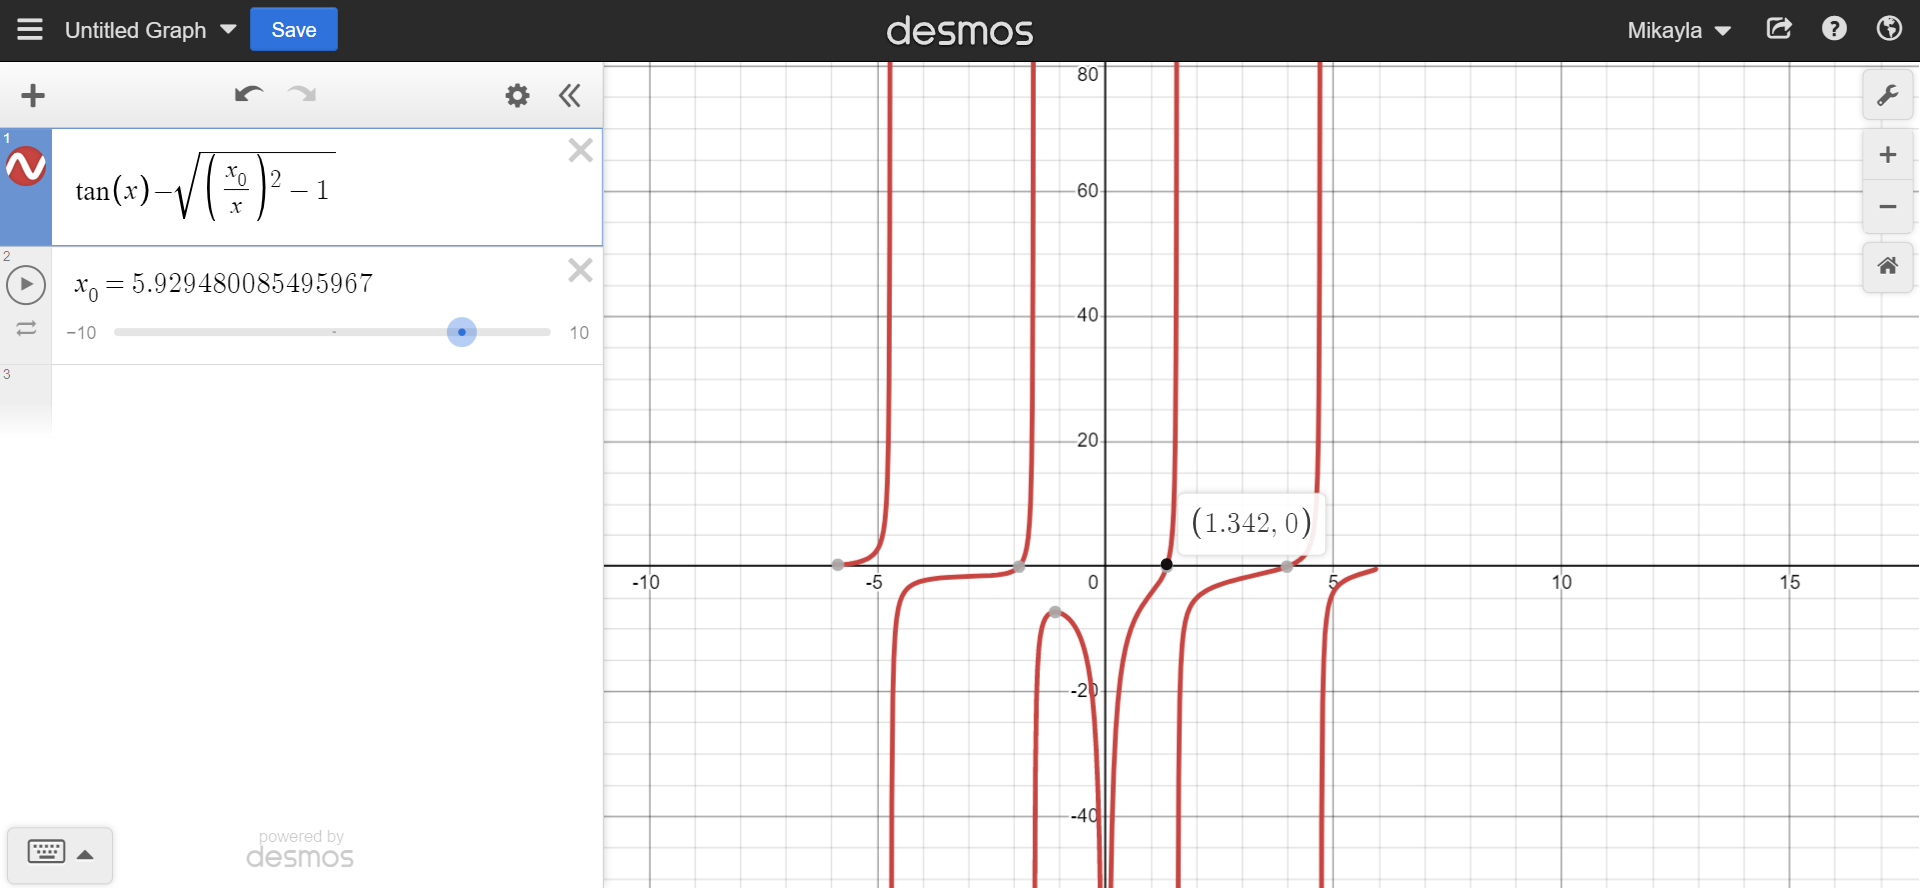

To escape the well the electron energy needs to reach $V_0$, hence the ionization energy is given by equation 13:

In [253]:
def finite_well_energy(z):
  return ((z**2 * h_bar**2)/(2 * m * w**2))*1.6022*10**(-19)

E_1 = round(finite_well_energy(1.342), 5)

display(Math(f'E_1 = {E_1} \\text{{ eV}} = {round(E_1 * 10 ** 3, 4)} \\text{{ meV}}'))

E_ionization = 0.2 - E_1

display(Math(f'E_\\text{{ionization}} = V_0 - E_0 = {E_ionization} \\text{{ eV}} =' +
             f'{round(E_ionization * 10 ** 3, 4)} \\text{{ meV}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# b.
Since the electron needs only an additional $189.76$ meV to escape the well the remaining energy absorbed from the photon will be $300 - 189.76 = 110.24\text{ meV}$.

To get $\lambda$, we use the De Broglie equation for the wavelength of a matter wave, $\lambda = \frac{h}{\sqrt{2mE}}$.

In [254]:
display(Math(f'E_\\text{{k}} = 110.24 \\text{{ meV}}'))

#multiplying by q below to convert h and E to standard SI units and then times 10^9 to convert meters to nm
display(Math(f'\\lambda = {round(((h*q/(2*m*0.11024*q)**0.5)) * 10**9, 3)} \\text{{ nm}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 4
Consider a triangular potential well with $V_0\rightarrow\infty$ for $x<0$, and $V\left(x\right)=Fx$ for $x>0$, with $F = 0.025eV \text{nm}^{-1}$.  Using the analytical solutions (Airy functions) calculate the two lowest energy levels in the quantum well (use an effective mass appropriate to GaAs electrons, $m = 0.067m_0$). (434: 12 pts, 591: 8 pts)



The equation for the energy values of a particle in a triangular well is:
$E_n = -\alpha_n\left(\frac{\hbar^2 q^2 \varepsilon^2}{2m}\right)^{\frac{1}{3}}$ where $\alpha_n$ is the $\text{n}_\text{th}$ root of the $Ai$ function and $\varepsilon$ is the electric field strength.

Equation source: <https://mazziotti.uchicago.edu/journal/jain_v.pdf>, page 13

In [255]:
F = 0.025*q/(10**(-9)) #convert F to Newtons
hbar = 1.054571817 * 10**(-34) #in Joule/Hz
epsilon = F/q #in N/C

#approximate values of first two zeroes of Airy function obtained from Wolfram Alpha
alpha_1 = -2.33810741
alpha_2 = -4.08794944

def triangular_energy(alpha):
  return -alpha*((hbar**2 * q**2 * epsilon**2)/(2*m))**(1/3)

temp1 = round(triangular_energy(alpha_1), 25)
temp2 = round(triangular_energy(alpha_2), 25)

display(Math(f'E_1 = {latex(temp1)} \\text{{ J}} = '
             f'{round(temp1/q, 5)} \\text{{ eV}} = '
             f'{round(temp1 * 10**(3) / q, 2)} \\text{{ meV}}'))
display(Math(f'E_2 = {latex(temp2)} \\text{{ J}} = '
             f'{round(temp2/q, 5)} \\text{{ eV}} = '
             f'{round(temp2 * 10**(3) / q, 2)} \\text{{ meV}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>